# Assignment 2: Data Cleaning
## Group 105
- Natasa Bolic (300241734)
- Brent Palmer (300193610)
## Imports

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1: Clean Data Checker

## Introduction

Paragraph here

## Dataset Description

**Url:** https://www.kaggle.com/datasets/ahmedmohamed2003/cafe-sales-dirty-data-for-cleaning-training <br>
**Name:** Cafe Sales - Dirty Data for Cleaning Training <br>
**Author:** Ahmed Mohamed <br>
**Purpose:** The dirty cafe sales dataset was fabricated to practice data cleaning, deliberately including missing data, inconsistencies, and errors. The Kaggle description specifies that the dataset "can be used to practice cleaning techniques, data wrangling, and feature engineering."<br>
**Shape:** There are 10,000 rows and 8 columns. (10000, 8)<br>
**Features:** 
- `Transaction ID` (categorical): A unique id assigned to each transaction.
- `Item` (categorical): The name of the purchased item.
- `Quantity` (numerical): The number of the purchased item.
- `Price Per Unit` (numerical): The price of one unit of the purchased item.
- `Total Spent` (numerical): The total amount spent in the transaction. (Quantity * Price Per Unit)
- `Payment Method` (categorical): The transaction's method of payment.
- `Location` (categorical): The location of the transaction.
- `Transaction Date` (numerical): The transaction date.

## Loading Dataset and Basic Exploration

In [2]:
# Read in the dataset from a public repository
url = "https://raw.githubusercontent.com/Natasa127/CSI4142-A2/main/dirty_cafe_sales.csv"
sales = pd.read_csv(url)
sales.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [4]:
sales.shape

(10000, 8)

## Data Checks

### 1) Data Type Errors

This test checks the data type of an attribute whose entries should be numerical (either an integer or a float).

**References:** <br>
Converting to numeric: https://pandas.pydata.org/docs/reference/api/pandas.to_numeric.html <br>
Setting the type: https://www.geeksforgeeks.org/python-pandas-dataframe-astype/ <br>
Selecting rows in one dataframe but not in another: https://discovery.cs.illinois.edu/guides/DataFrame-Row-Selection/dataframe-isin-selection/

In [5]:
# Parameters to be edited by the user
attributes = ['Quantity', 'Price Per Unit', 'Total Spent']
datatypes = ['int', 'float']

test_attribute = 'Quantity'
test_datatype = 'int'


In [6]:
# Error check
def type_filter(df, col, datatype):
    # Creates a copy so that the original dataset is not modified
    df_filtered = df.copy()

    # Converts numeric data to a numeric type and sets all other values to NaN
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')
    # Removes NaN values to leave only numerical values
    df_filtered = df_filtered.dropna(subset=[col]).copy()
    
    if datatype == 'int':
        # Takes only the integer values
        df_filtered = df_filtered[df_filtered[col] % 1 == 0].copy()

        # Converts the type to integer (as opposed to float)
        df_filtered[col] = df_filtered[col].astype(datatype)

    # Returns the filtered dataset
    return df_filtered

checked_sales = type_filter(sales, test_attribute, test_datatype)
checked_sales.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9521 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    9521 non-null   object
 1   Item              9206 non-null   object
 2   Quantity          9521 non-null   int32 
 3   Price Per Unit    9349 non-null   object
 4   Total Spent       9353 non-null   object
 5   Payment Method    7074 non-null   object
 6   Location          6412 non-null   object
 7   Transaction Date  9371 non-null   object
dtypes: int32(1), object(7)
memory usage: 632.3+ KB


In [7]:
# Accesses entries with invalid datatypes for the given column
invalid_type = sales[~sales.index.isin(checked_sales.index)]
# Obtains number of invalid entries
print(len(invalid_type))
# Displays 5 invalid entries
invalid_type.head()

479


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,ERROR,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,ERROR,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,UNKNOWN,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,NaN,2023-03-30
117,TXN_2148617,Juice,ERROR,3.0,9.0,Digital Wallet,UNKNOWN,2023-01-10


Results:

There are 479 rows with a quantity that is not an integer. This seems to occur when the value is unknown, and replaced by a string such as 'UNKNOWN' or 'ERROR' instead. For example, see the two rows below:

<u>Transaction ID / Item / Quantity
Transaction ID	/ Item	/ Quantity 	/ Price Per Unit	Total Spent	/ Payment Method	/ Location	/ Transaction Date</u>

TXN_3522028	/ Smoothie	/ ERROR	/ 4.0	/ 20.0	/ Cash	/ In-store	/ 2023-04-04

TXN_5522862	/ Cookie	/ ERROR	/ 1.0	/ 2.0	/ Credit Card	/ Takeaway	/ 2023-03-19

We perform data type checks for the rest of the numerical attributes so that the columns have the correct datatype in subsequent checks.

In [8]:
# Filter by type for the remaining numerical attributes
checked_sales = type_filter(checked_sales, attributes[1], datatypes[1])
checked_sales = type_filter(checked_sales, attributes[2], datatypes[1])
checked_sales.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8544 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    8544 non-null   object 
 1   Item              8261 non-null   object 
 2   Quantity          8544 non-null   int32  
 3   Price Per Unit    8544 non-null   float64
 4   Total Spent       8544 non-null   float64
 5   Payment Method    6354 non-null   object 
 6   Location          5762 non-null   object 
 7   Transaction Date  8415 non-null   object 
dtypes: float64(2), int32(1), object(5)
memory usage: 567.4+ KB


### 2) Range Errors

This test checks the range of a numerical variable, which consists of checking if the value of the variable is within the minimum and maximum acceptable values.

In [9]:
# Parameters to be edited by the user
attributes = ['Quantity', 'Price Per Unit', 'Total Spent']

test_attribute = 'Quantity'

minimum = 1

maximum = 5

In [10]:
# Error check

# Extract values that are either above the maximum acceptable value or below the minimum acceptable value
invalid_range = checked_sales[(checked_sales[test_attribute] > maximum) | (checked_sales[test_attribute] < minimum)]
invalid_range

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date


Results:

There are no values for quantity that are outside of the acceptable range.

TODO: maybe we should add invalid entries (like -1)

### 3) Format Errors

This test checks that dates are stored in the correct format, i.e. YYYY-MM-DD.


References:

Convert to datetime: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

In [11]:
# Parameters to be edited by the user
attribute = 'Transaction Date'

In [12]:
# Error Check

def format_filter(df, col):
    df_filtered = df.copy()
    
    # Sets all values that are not dates into NaT (not a time)
    df_filtered[col] = pd.to_datetime(df_filtered[col], yearfirst = True, errors='coerce')
    
    # Removes NaN values to leave only the values in the right format
    df_filtered = df_filtered.dropna(subset=[col]).copy()
    
    # Print the DataFrame to check the result
    return df_filtered

new_checked_sales = format_filter(checked_sales, attribute)
new_checked_sales.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11
5,TXN_2602893,Smoothie,5,4.0,20.0,Credit Card,NaN,2023-03-31


In [13]:
# Accesses entries with invalid format for the given column
invalid_format = checked_sales[~checked_sales.index.isin(new_checked_sales.index)]
# Obtains number of invalid entries
print(len(invalid_format))
# Displays 5 invalid entries
invalid_format.head()

385


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
11,TXN_3051279,Sandwich,2,4.0,8.0,Credit Card,Takeaway,ERROR
29,TXN_7640952,Cake,4,3.0,12.0,Digital Wallet,Takeaway,ERROR
33,TXN_7710508,UNKNOWN,5,1.0,5.0,Cash,NaN,ERROR
77,TXN_2091733,Salad,1,5.0,5.0,NaN,In-store,NaN
103,TXN_7028009,Cake,4,3.0,12.0,NaN,Takeaway,ERROR


Results:

There are 385 rows where the transaction date is in the wrong format. For example, see the two rows below:

<u>Transaction ID / Item / Quantity
Transaction ID	/ Item	/ Quantity 	/ Price Per Unit	Total Spent	/ Payment Method	/ Location	/ Transaction Date</u>

TXN_3051279	/ Sandwich	/ 2	/ 4.0	/ 8.0	/ Credit Card	/ Takeaway	/ ERROR

TXN_7640952	/ Cake	/ 4	/ 3.0	/ 12.0	/ Digital Wallet	/ Takeaway	/ ERROR

# Part 2: Imputation

## Introduction

Paragraph here

## Dataset Description

**Url:** https://www.kaggle.com/datasets/uciml/autompg-dataset <br>
**Name:** Auto-mpg Dataset <br>
**Author:**  <br>
**Purpose:** <br>
**Shape:** There are X rows and Y columns. (X, Y)<br>
**Features:** 
- `Transaction ID` (categorical): 

**Missing Values:** Yes, there are missing values. In particular, horsepower has 6 missing values.

## Loading Dataset and Basic Exploration

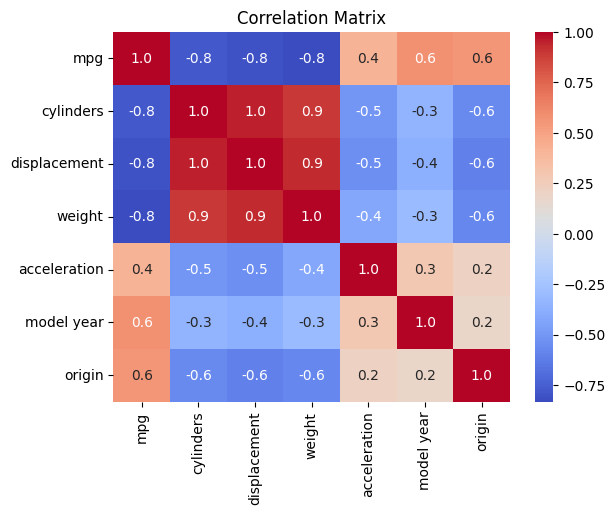

In [39]:
df = pd.read_csv("auto-mpg.csv")
num_df = df.select_dtypes(include='number')
corr_matrix = num_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()